<a href="https://colab.research.google.com/github/aakashkumarme/ML-LEARN/blob/main/5_Improving_a_model_HyperparameterTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

 Three ways to adjust hyperparameter


1.   By hand
2.   Randomly with RandomSearchCV
3.   Randomly with GridSearchCV



# **# 1. By Hand :**

In [30]:
# 1. By Hand :


def evaluate_preds(y_true,y_preds):
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    metric_dict = {"accuracy " : round(accuracy,2),
                  "precision " : round(precision,2),
                  "recall " : round(recall,2),
                  "f1 " : round(f1,2)}

    print(f"Acc: {accuracy * 100:.2f}%" )
    print(f"precision:{precision:.2f}%" )
    print(f"recall:{recall:.2f}%" )
    print(f"f1: {f1:.2f}%" )
    return metric_dict

In [34]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
heart_diseases = pd.read_csv("/content/drive/MyDrive/dataset/heart-disease.csv")
heart_diseases.head()

#shuffle the data
heart_diseases_shuffled = heart_diseases.sample(frac=1)

X = heart_diseases_shuffled.drop("target",axis = 1)
y = heart_diseases_shuffled["target"]

#Split the data into train, validation and test
train_split = round(0.7 * len(heart_diseases_shuffled))
valid_split = round(train_split + 0.15 * len(heart_diseases_shuffled))

X_train,y_train = X[:train_split],y[:train_split]
X_valid,y_valid = X[train_split:valid_split],y[train_split:valid_split]
X_test,y_test = X[valid_split:],y[:valid_split]

len(X_train) , len(X_valid) , len(X_test)

clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_preds = clf.predict(X_valid)

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score #import the parameters
#baseline prediction
baseline_metrics = evaluate_preds(y_valid,y_preds)
baseline_metrics

Acc: 82.22%
precision:0.81%
recall:0.88%
f1: 0.85%


{'accuracy ': 0.82, 'f1 ': 0.85, 'precision ': 0.81, 'recall ': 0.88}

In [39]:
 #adjust hyperparamter-1
 # Create a second classifier with different hyper parameter

np.random.seed(42)
clf2 = RandomForestClassifier(n_estimators=10)
clf2.fit(X_train,y_train)
y_preds2 = clf2.predict(X_valid)

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score #import the parameters
#baseline prediction
clf2_metrics = evaluate_preds(y_valid,y_preds2)
clf2_metrics

Acc: 82.22%
precision:0.84%
recall:0.84%
f1: 0.84%


{'accuracy ': 0.82, 'f1 ': 0.84, 'precision ': 0.84, 'recall ': 0.84}

In [41]:
 #adjust hyperparamter-2
 # Create a second classifier with different hyper parameter

np.random.seed(42)
clf3 = RandomForestClassifier(n_estimators=100,max_depth=10)
clf3.fit(X_train,y_train)
y_preds2 = clf3.predict(X_valid)

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score #import the parameters
#baseline prediction
clf3_metrics = evaluate_preds(y_valid,y_preds2)
clf3_metrics

Acc: 80.00%
precision:0.81%
recall:0.84%
f1: 0.82%


{'accuracy ': 0.8, 'f1 ': 0.82, 'precision ': 0.81, 'recall ': 0.84}

# **# 2. By RandomSearchCV :**

In [53]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10,100,200,500,1000,1200],
        "max_depth" : [None,5,10,20,30],
        "max_features": ["auto","sqrt"],
        "min_samples_split": [2,4,6],
        "min_samples_leaf":[1,2,4]}

np.random.seed(42)

X = heart_diseases_shuffled.drop("target",axis = 1)
y = heart_diseases_shuffled["target"]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

#Setup RandomizesSearchCV
rs_clf = RandomizedSearchCV(estimator = clf ,
                            param_distributions = grid,
                            n_iter=10,
                            cv = 5,
                            verbose = 2) 
#Fit  RandomizedSearchCV version of clf
rs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.2s
[CV] n_estimators=100, min_samples_split=4, min_samp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   28.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [54]:
  rs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 200}

In [56]:
rs_y_preds = rs_clf.predict(X_test)

rs_metrics = evaluate_preds(y_test,rs_y_preds)

Acc: 81.97%
precision:0.77%
recall:0.86%
f1: 0.81%


# **# 3. By GridSearchCV :**

In [57]:
grid

{'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 4, 6],
 'n_estimators': [10, 100, 200, 500, 1000, 1200]}

In [58]:
grid2 = {'max_depth': [None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_leaf': [1, 2],
         'min_samples_split': [6],
         'n_estimators': [100, 200, 500]}

In [60]:
from sklearn.model_selection import GridSearchCV
np.random.seed(42)

X = heart_diseases_shuffled.drop("target",axis = 1)
y = heart_diseases_shuffled["target"]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

#Setup GridSearchCV
gs_clf = GridSearchCV(estimator = clf ,
                            param_grid = grid2,
                            cv = 5,
                            verbose = 2) 
#Fit  GridSearchCV version of clf
gs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   25.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=1,
                                              oob_score=False,
                                              random_s

In [61]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [62]:
gs_y_preds = gs_clf.predict(X_test)

gs_metrics = evaluate_preds(y_test,gs_y_preds)

Acc: 78.69%
precision:0.74%
recall:0.82%
f1: 0.78%


Comparing different models metrics

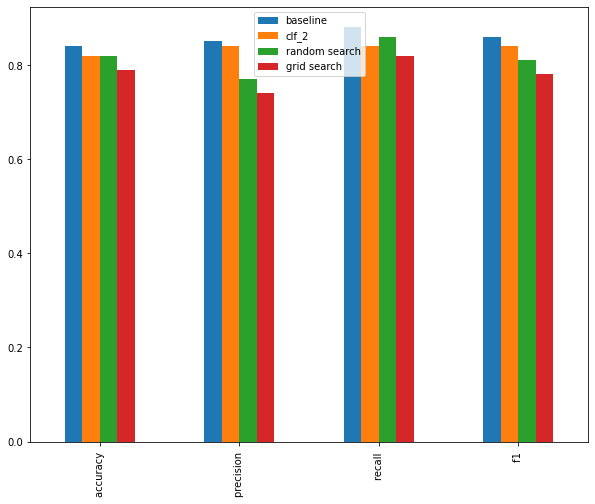

In [74]:

compare_metrics = pd.DataFrame({"baseline":baseline_metrics,
                                "clf_2": clf2_metrics,
                                "random search" : rs_metrics,
                                "grid search" : gs_metrics})
                               
compare_metrics.plot.bar(figsize=(10, 8));